In [1]:
# imports
import numpy as np
from sklearn import manifold
from matplotlib import pyplot as plt
%matplotlib inline
import lapjv

In [2]:
# embedding code
import os, sys

# Get the absolute path of the directory containing your modules
module_dir = os.path.abspath('pyha-analyzer-2.0/')

# Add the directory to the system path
sys.path.append(module_dir)

from pyha_analyzer import PyhaTrainer, PyhaTrainingArguments, extractors
from pyha_analyzer.models.demo_CNN import ResnetConfig, ResnetModel
from pyha_analyzer.preprocessors import MelSpectrogramPreprocessors
from pyha_analyzer.models import EfficentNet

import torch

coralreef_extractor = extractors.MultiCoralReef()
coral_ads = coralreef_extractor("/home/a.jajodia.229/acoustic/local_data/coral", sampling = True)
preprocessor = MelSpectrogramPreprocessors(duration=5, class_list=coral_ads["train"].features["labels"].feature.names)

coral_ads["train"].set_transform(preprocessor)
coral_ads["valid"].set_transform(preprocessor)
coral_ads["test"].set_transform(preprocessor)

resnet50d_config = ResnetConfig(
    num_classes=2, itorchut_channels=1, problem_type = "multi_label_classification", output_hidden_states = True
)

#model = EfficentNet(num_classes=len(coral_ads["train"].features["labels"].names))
model = EfficentNet(num_classes=2)
model.load_state_dict(torch.load('/home/a.jajodia.229/acoustic/acoustic_knowledge_discovery/pyha-analyzer-2.0/coral_model_4146a1f.pt'))

Site_A
Site_B
Site_C
A_Degraded_Reef
A_Non
Australia
French_Polynesia
Indonesia
count: 44558


Casting to class labels:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44558 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/140 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/18 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/42 [00:00<?, ? examples/s]

<All keys matched successfully>

In [3]:
data = coral_ads['train'][0:100]

In [4]:
data

{'sample_rate': [48000,
  48000,
  48000,
  44100,
  44100,
  48000,
  44100,
  48000,
  44100,
  48000,
  48000,
  48000,
  48000,
  44100,
  48000,
  44100,
  48000,
  44100,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  48000,
  44100,
  44100,
  48000,
  44100,
  48000,
  48000,
  48000,
  44100,
  44100,
  48000,
  48000,
  44100,
  48000,
  48000,
  48000,
  44100,
  48000,
  48000,
  48000,
  44100,
  44100,
  44100,
  44100,
  48000,
  44100,
  48000,
  44100,
  48000,
  48000,
  48000,
  48000,
  48000,
  44100,
  44100,
  48000,
  44100,
  44100,
  44100,
  48000,
  44100,
  48000,
  48000,
  44100,
  48000,
  44100,
  48000,
  48000,
  44100,
  48000,
  44100,
  48000,
  44100,
  48000,
  48000,
  44100,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  44100,
  48000,
  48000,
  48000],
 'labels': array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        

In [8]:
data.keys()

dict_keys(['sample_rate', 'labels', 'filepath', 'audio', 'audio_in', 'site'])

TypeError: unhashable type: 'list'

In [6]:
embeddings = model.get_embedding(**data)

TypeError: EfficentNet.get_embedding() got an unexpected keyword argument 'sample_rate'

In [ ]:
len(embeddings)

100

In [ ]:
# get 2d embeddings
tsne = manifold.TSNE(random_state = 1, n_components=2, learning_rate=50)
data2d = tsne.fit_transform(embeddings)

data2d -= data2d.min(axis=0)
data2d /= data2d.max(axis=0)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)

# data2d = pca.fit_transform(embeddings)
# data2d -= data2d.min(axis=0)
# data2d /= data2d.max(axis=0)

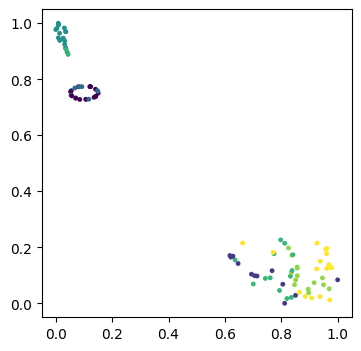

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(data2d[:,0], data2d[:,1], c=data['site'], edgecolors='none', marker='o', s=12)  
plt.show()

In [ ]:
side = 10
xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

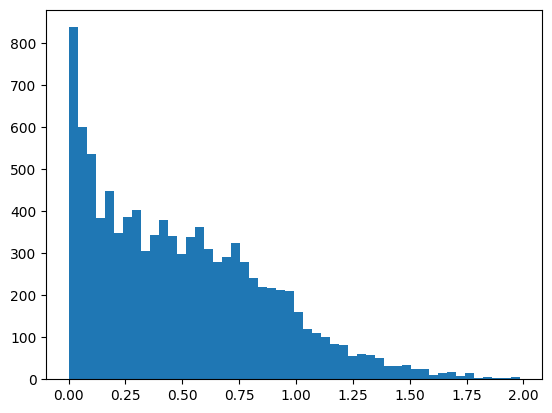

In [ ]:
from scipy.spatial.distance import cdist
cost = cdist(grid, data2d, 'sqeuclidean')
plt.hist(cost.flatten(), bins=50)
plt.show()

In [ ]:
cost = cost * (10000000. / cost.max())

(100,)


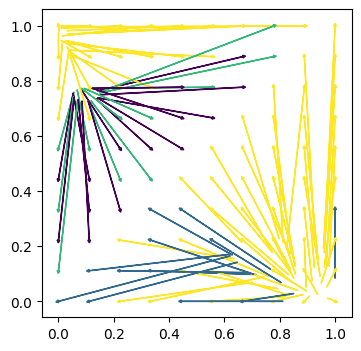

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

cmap = cm.viridis
norm = Normalize(vmin=0, vmax=3) # Adjust vmin/vmax based on your data range

min_cost, row_assigns, col_assigns = lap.lapjv(np.copy(cost))
grid_jv = grid[col_assigns]
print(col_assigns.shape)
plt.figure(figsize=(4, 4))
for index, (start, end) in enumerate(zip(data2d, grid_jv)):
    arrow_color = cmap(norm(data['site'][index]))
    
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
              head_length=0.01, head_width=0.01, fc=arrow_color, ec=arrow_color)
plt.show()

/tmp/ipykernel_63724/1472136075.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ax, item in tqdm_notebook(zip(grid, images)):


0it [00:00, ?it/s]

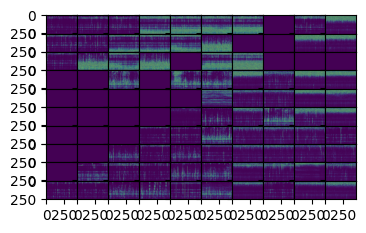

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm_notebook


fig = plt.figure(figsize=(4., 4.))



coords = (grid_jv*9).astype(int)

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),
                 axes_pad=0,  # pad between Axes in inch.
                 )

indexes = np.lexsort((coords[:, 0], -coords[:, 1]))

images = np.array(data['audio']).squeeze()[indexes]

for ax, item in tqdm_notebook(zip(grid, images)):
    spectrogram_tensor = torch.tensor(item, dtype=torch.float32)
    im = spectrogram_tensor.squeeze(0).numpy()  # shape: (H, W)
    

    # print(im)  # Optionally print for debugging
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    
plt.show()

In [ ]:
import IPython

def play_from_grid(x,y, data):
    filepath, audio = (np.array(data[datatype])[indexes.reshape((10,10))][9-y,x]
                                       for datatype in ['filepath', 'audio'])
    
    
    print(filepath)
    
    fig = plt.figure(figsize=(8., 8.))
    
    ax = fig.gca()
    
    spectrogram_tensor = torch.tensor(audio, dtype=torch.float32)
    im = spectrogram_tensor.squeeze(0).numpy()  # shape: (H, W)
    
    ax.imshow(im)
    
    display(IPython.display.Audio(filepath, autoplay=True))
    
    
    
    return None

/home/a.jajodia.229/acoustic/local_data/Paola/Non_Degraded_Reef/May 2025/20250316_193900.WAV


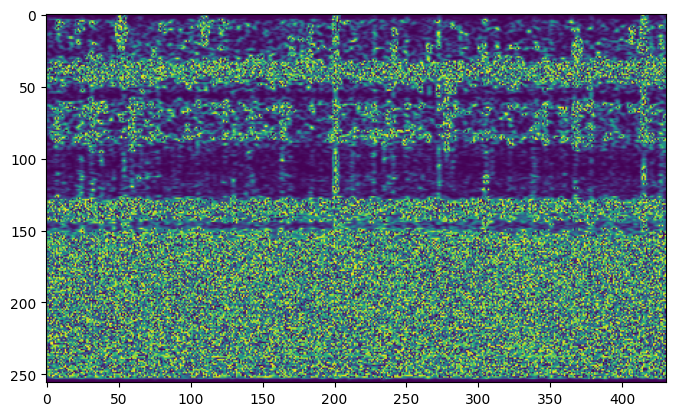

In [ ]:
play_from_grid(6,7, data)